In [1]:
import sys
sys.path.append('c:\\Users\\poder\\lab\\DIA_plot\\')
import Spytrometer
from datetime import datetime
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# Initialize pycomet object
spy = Spytrometer.Spytrometer(max_peak=2000)
#high resolution data: bin_width = 0.02, bin_offset = 0

In [3]:
# Load data
start_time = datetime.now()
spy.load_dia_data('c:\\Users\\poder\\lab\\DIA_plot\\e01306.mzML', precursor_mass = 410.4365)


Loading spectrum data...
Done. Time (h:m:s):	0:00:49.076915


In [4]:
for spectrum_id, spectrum in enumerate(spy.spectrum_collection):
    spy.discretize_spectrum(spectrum_id)
    spy.normalize_regions(spectrum_id)

    
spy.sort_spectra()
   
print("Protein digestion done. Time (h:m:s):\t"+str(datetime.now() - start_time))
print("Number of spectra:\t%d"%(len(spy.spectrum_collection)))

Protein digestion done. Time (h:m:s):	0:00:51.454050
Number of spectra:	1790


In [5]:
for spectrum_id in range(3):
    spy.plot_spectrum(spectrum_id, filename="DIA_{}_full".format(spectrum_id), font_size=42, show_annotation=False)

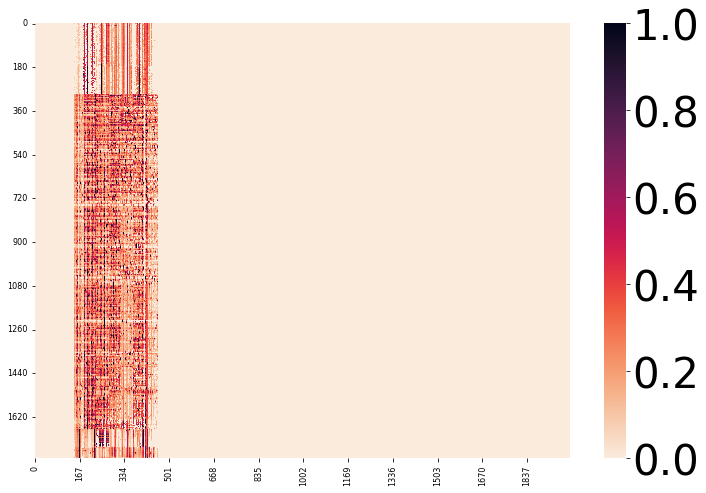

In [6]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

spectrum_collection_concat = []
for i in range(len(spy.spectrum_collection)):
    spectrum_collection_concat.append(spy.spectrum_collection[i].spectrum_array)
    
spectrum_col_concat = np.array(spectrum_collection_concat)
plt.figure(figsize = (12,8))
ax = sns.heatmap(spectrum_col_concat, cmap="rocket_r")
plt.tick_params(axis='both', which='major', labelsize=8)
plt.show()

In [ ]:
import matplotlib.pyplot as plt 

fig, ax = plt.subplots(nrows=len(spectrum_collection_concat), ncols=1, figsize=(1000, len(spectrum_collection_concat)))
for i in range(len(spectrum_collection_concat)):
    ax[i].pcolormesh([spectrum_collection_concat[i]], cmap='Greys', shading='flat')
fig.savefig("hist_1.pdf", bbox_inches="tight")
fig.clf()